In [58]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings

stop_words = set(stopwords.words('english'))
path=r"C:\Users\Vinoth\Downloads\Hate Speech Dataset\Text file"
files=os.listdir(path)
dff=pd.read_csv(r"C:\Users\Vinoth\Downloads\Hate Speech Dataset\Annotations_Metadata.csv")
dff


,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate
...,...,...,...,...,...
10939,33676864_5,734541,1388,0,noHate
10940,33677019_1,735154,1388,0,noHate
10941,33677019_2,735154,1388,0,noHate
10942,33677053_1,572266,1388,0,hate


In [18]:
data=[]
for i in files:
    filepath=path+"/"+i
    f = open(filepath, "r", encoding='utf8')
    context=f.read()
    dic={'filename':i[:-4],'context':context}
    data.append(dic)
    
df=pd.DataFrame(data)
df
df.rename(columns={'filename':'file_id'}, inplace=True)
df

,file_id,context
0,12834217_1,"As of March 13th , 2014 , the booklet had been..."
1,12834217_10,Thank you in advance. : ) Download the youtube...
2,12834217_2,In order to help increase the booklets downloa...
3,12834217_3,( Simply copy and paste the following text int...
4,12834217_4,Click below for a FREE download of a colorfull...
...,...,...
10939,33677015_1,Apparently he came to the conclusion that his ...
10940,33677019_1,Wish we at least had a Marine Le Pen to vote f...
10941,33677019_2,Its like the choices are white genocide candid...
10942,33677053_1,Why White people used to say that sex was a si...


In [19]:
df['file_id']=df['file_id'].astype(str)
dff['file_id']=dff['file_id'].astype(str)
mergefd=pd.merge(df,dff, on='file_id', how='outer')
mergefd



,file_id,context,user_id,subforum_id,num_contexts,label
0,12834217_1,"As of March 13th , 2014 , the booklet had been...",572066,1346,0,noHate
1,12834217_10,Thank you in advance. : ) Download the youtube...,572066,1346,0,noHate
2,12834217_2,In order to help increase the booklets downloa...,572066,1346,0,noHate
3,12834217_3,( Simply copy and paste the following text int...,572066,1346,0,noHate
4,12834217_4,Click below for a FREE download of a colorfull...,572066,1346,0,hate
...,...,...,...,...,...,...
10939,33677015_1,Apparently he came to the conclusion that his ...,572948,1388,0,noHate
10940,33677019_1,Wish we at least had a Marine Le Pen to vote f...,735154,1388,0,noHate
10941,33677019_2,Its like the choices are white genocide candid...,735154,1388,0,noHate
10942,33677053_1,Why White people used to say that sex was a si...,572266,1388,0,hate


In [20]:
mergefd.to_csv(r'C:\Users\Vinoth\Downloads\Hate Speech Dataset\mergedf.csv')

In [21]:
def dataprocessing(context):
    context=context.lower()
    context=re.sub(r"https\S+|www\S+http\S+", '', context, flags = re.MULTILINE)
    context = re.sub(r'\@w+|\#','', context)
    context = re.sub(r'[^\w\s]','',context)
    context = re.sub(r'ð','',context)
    context_tokens = word_tokenize(context)
    filtered_context = [w for w in context_tokens if not w in stop_words]
    return " ".join(filtered_context)
    
mergefd['context']=mergefd['context'].apply(dataprocessing)
mergefd

,file_id,context,user_id,subforum_id,num_contexts,label
0,12834217_1,march 13th 2014 booklet downloaded 18300 times...,572066,1346,0,noHate
1,12834217_10,thank advance download youtube description box...,572066,1346,0,noHate
2,12834217_2,order help increase booklets downloads would g...,572066,1346,0,noHate
3,12834217_3,simply copy paste following text youtube video...,572066,1346,0,noHate
4,12834217_4,click free download colorfully illustrated 132...,572066,1346,0,hate
...,...,...,...,...,...,...
10939,33677015_1,apparently came conclusion french poor win que...,572948,1388,0,noHate
10940,33677019_1,wish least marine le pen vote canada,735154,1388,0,noHate
10941,33677019_2,like choices white genocide candidate 1 2 3,735154,1388,0,noHate
10942,33677053_1,white people used say sex sin used mystery saw...,572266,1388,0,hate


In [22]:
mergefd = mergefd.drop_duplicates('context')

In [23]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    context = [lemmatizer.lemmatize(word) for word in data]
    return data
mergefd['context'] = mergefd['context'].apply(lambda x: lemmatizing(x))

C:\Users\Vinoth\AppData\Local\Temp\ipykernel_15004\939349660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergefd['context'] = mergefd['context'].apply(lambda x: lemmatizing(x))


In [24]:
mergefd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10602 entries, 0 to 10942
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_id       10602 non-null  object
 1   context       10602 non-null  object
 2   user_id       10602 non-null  int64 
 3   subforum_id   10602 non-null  int64 
 4   num_contexts  10602 non-null  int64 
 5   label         10602 non-null  object
dtypes: int64(3), object(3)
memory usage: 579.8+ KB


In [25]:
mergefd['label'].value_counts()

noHate      9194
hate        1189
relation     164
idk/skip      55
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

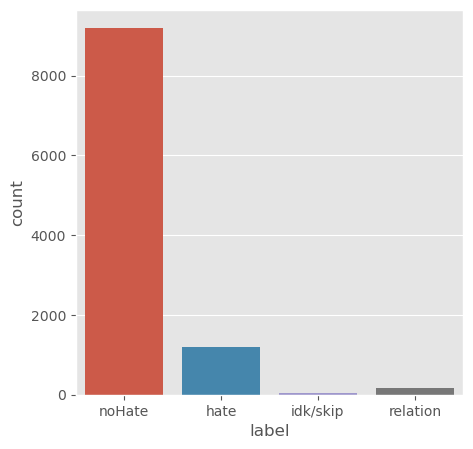

In [26]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = mergefd)

<Axes: >

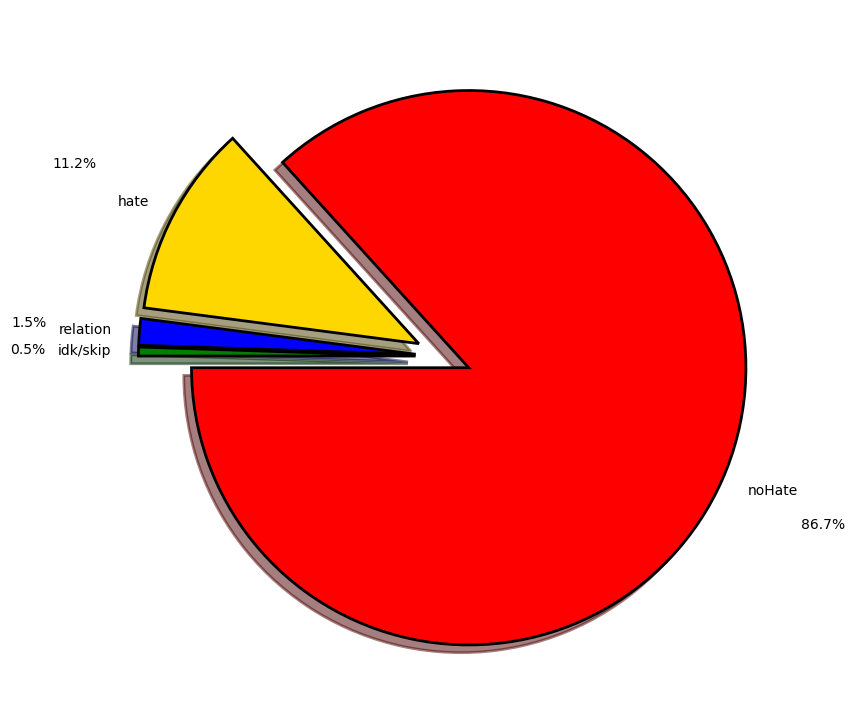

In [27]:
fig = plt.figure(figsize=(9,9))
colors = ("red", "gold","blue","green")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = mergefd['label'].value_counts()
explode = (0.1, 0.1, 0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', pctdistance=1.4, shadow=True, colors = colors, startangle =180, 
         wedgeprops = wp, explode = explode, label='') 


In [28]:
non_hate_context = mergefd[mergefd.label == 'noHate']
non_hate_context.head()

,file_id,context,user_id,subforum_id,num_contexts,label
0,12834217_1,march 13th 2014 booklet downloaded 18300 times...,572066,1346,0,noHate
1,12834217_10,thank advance download youtube description box...,572066,1346,0,noHate
2,12834217_2,order help increase booklets downloads would g...,572066,1346,0,noHate
3,12834217_3,simply copy paste following text youtube video...,572066,1346,0,noHate
5,12834217_5,click download 742 mb green banner link,572066,1346,0,noHate


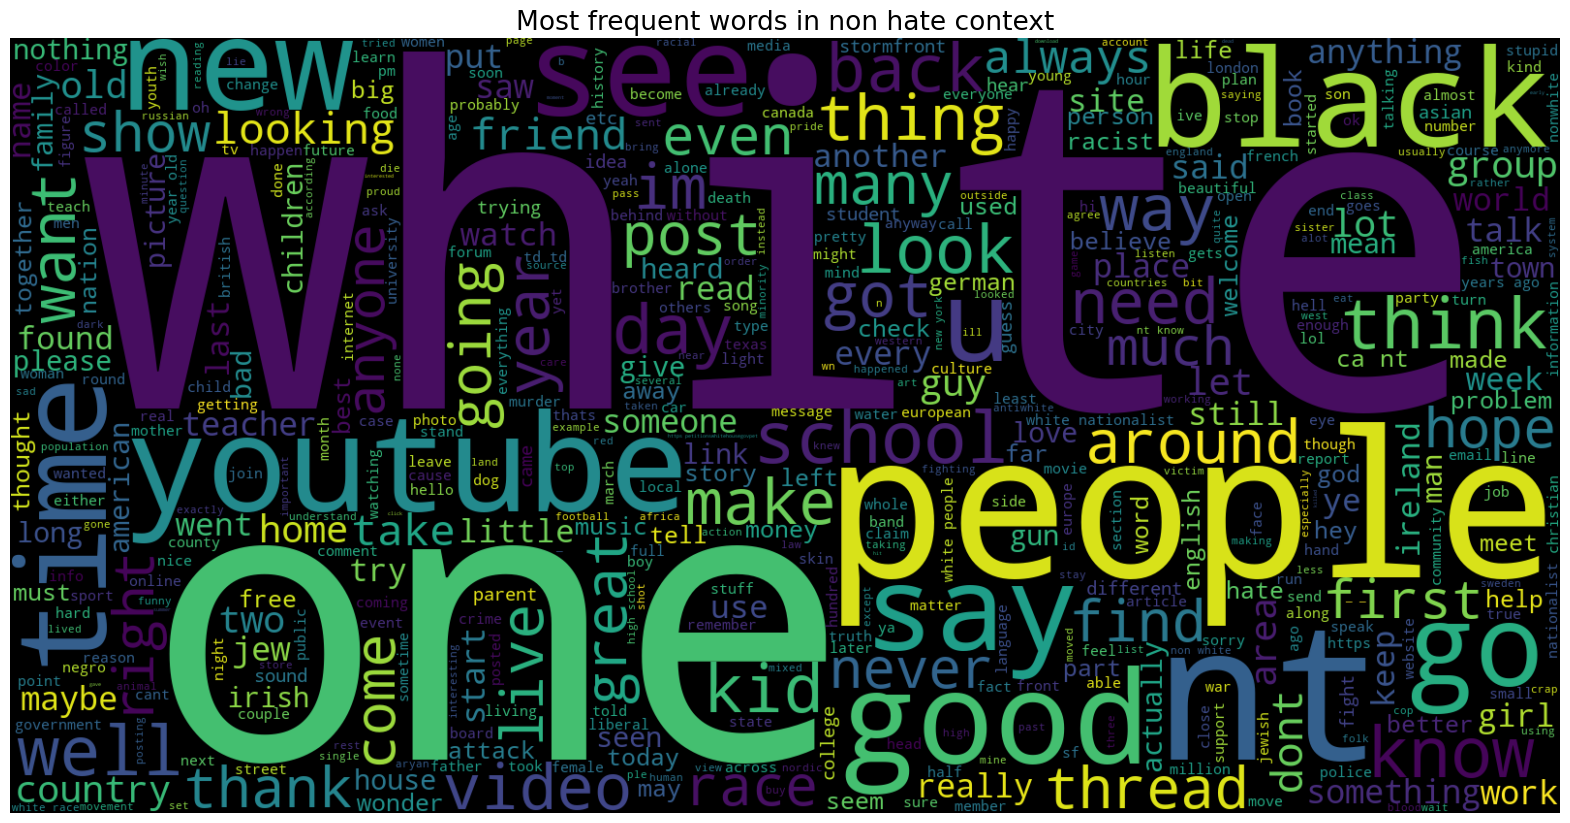

In [29]:
text = ' '.join([word for word in non_hate_context['context']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate context', fontsize = 19)
plt.show()

In [30]:
neg_context = mergefd[mergefd.label == 'hate']
neg_context.head()

,file_id,context,user_id,subforum_id,num_contexts,label
4,12834217_4,click free download colorfully illustrated 132...,572066,1346,0,hate
19,12834493_1,may may jew certainly stupid seems think black...,572058,1396,0,hate
21,12834922_2,god knows would come africa blacks could come ...,572429,1396,0,hate
24,12835050_1,im insulted stupid jews think see see reading ...,572385,1346,0,hate
30,12842423_1,surprise jews promote faggotry,572506,1397,0,hate


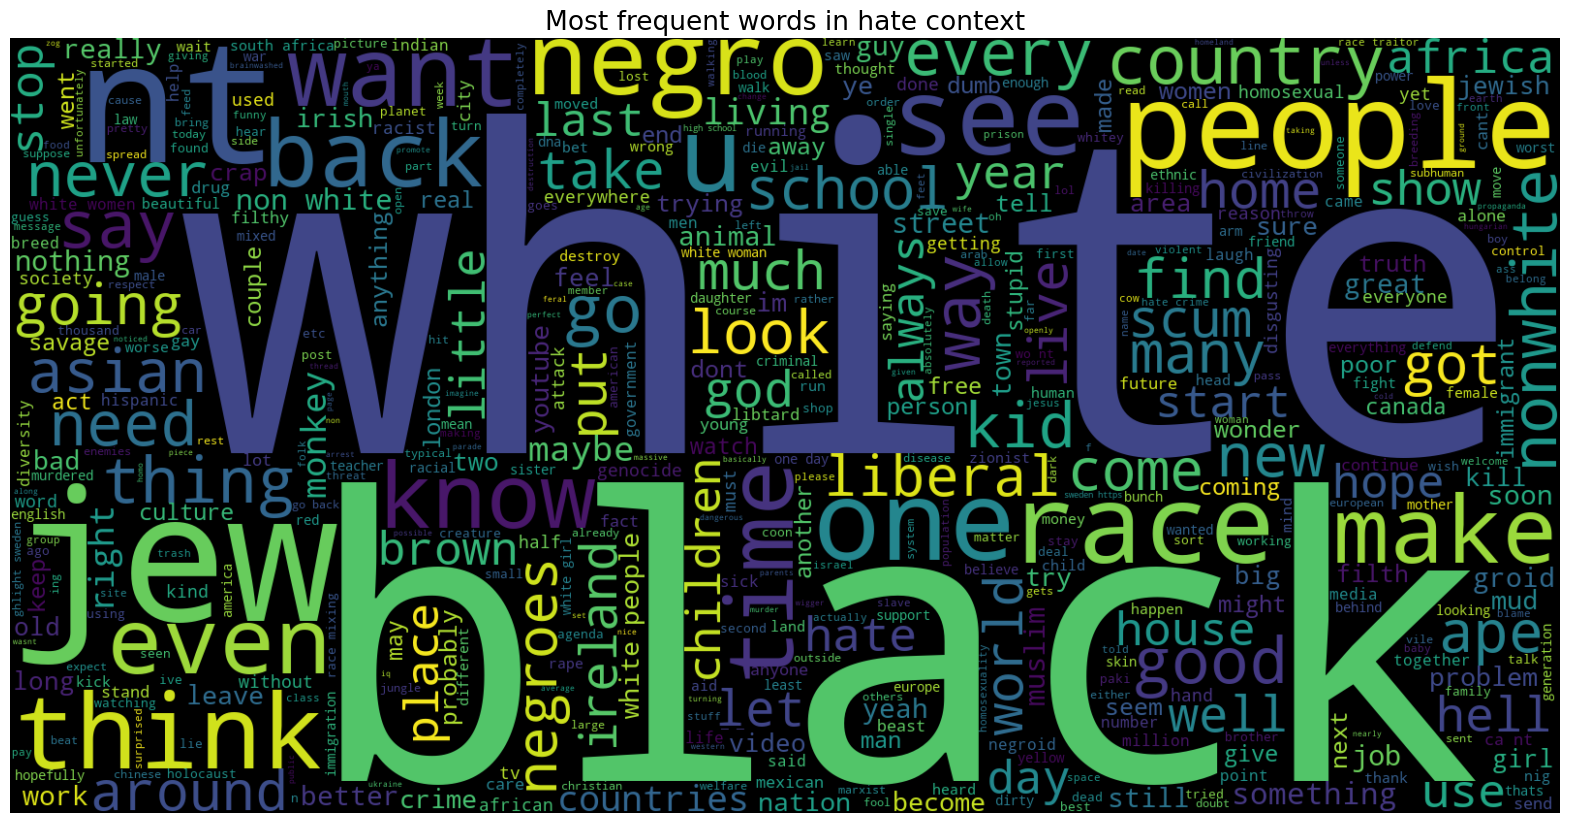

In [31]:
text = ' '.join([word for word in neg_context['context']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate context', fontsize = 19)
plt.show()

In [36]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(mergefd['context'])

In [40]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 86132

First 20 features: 
['00' '00 32' '00 48' '00 50' '00 anyone' '00 area' '00 bucks' '00 link'
 '000' '000 000' '000 97' '000 buck' '000 buckshot45lc' '000 euro'
 '000 standard' '000 vs' '0003' '001' '001 misdemeanor' '001 read']


In [41]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(mergefd['context'])

In [42]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 155247

First 20 features: 
['00' '00 32' '00 32 00' '00 48' '00 48 00' '00 50' '00 50 00' '00 anyone'
 '00 area' '00 bucks' '00 bucks gear' '00 link' '00 link discuss' '000'
 '000 000' '000 000 euro' '000 97' '000 97 white' '000 buck'
 '000 buck devestating']


In [44]:
X = mergefd['context']
Y = mergefd['label']
X = vect.transform(X)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [53]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (7421, 155247)
Size of y_train: (7421,)
Size of x_test:  (3181, 155247)
Size of y_test:  (3181,)


In [54]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 86.70%


In [55]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[   0    0  360    0]
 [   0    0   17    0]
 [   2    0 2758    0]
 [   0    0   44    0]]


              precision    recall  f1-score   support

        hate       0.00      0.00      0.00       360
    idk/skip       0.00      0.00      0.00        17
      noHate       0.87      1.00      0.93      2760
    relation       0.00      0.00      0.00        44

    accuracy                           0.87      3181
   macro avg       0.22      0.25      0.23      3181
weighted avg       0.75      0.87      0.81      3181



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


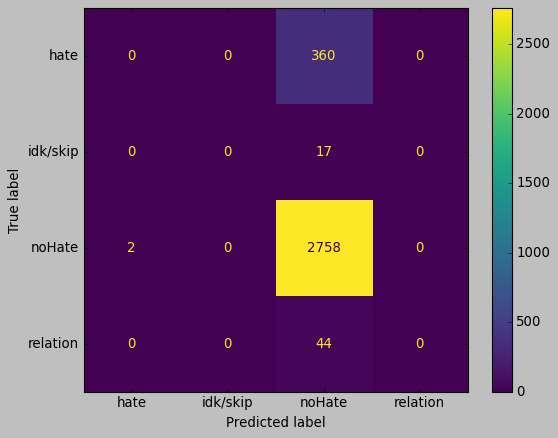

In [56]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [59]:
warnings.filterwarnings('ignore')
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.87
Best parameters:  {'C': 0.1, 'solver': 'newton-cg'}


In [61]:
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.77%


In [62]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[   0    0  360    0]
 [   0    0   17    0]
 [   0    0 2760    0]
 [   0    0   44    0]]


              precision    recall  f1-score   support

        hate       0.00      0.00      0.00       360
    idk/skip       0.00      0.00      0.00        17
      noHate       0.87      1.00      0.93      2760
    relation       0.00      0.00      0.00        44

    accuracy                           0.87      3181
   macro avg       0.22      0.25      0.23      3181
weighted avg       0.75      0.87      0.81      3181

